In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
import seaborn as sns


In [4]:
df=pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

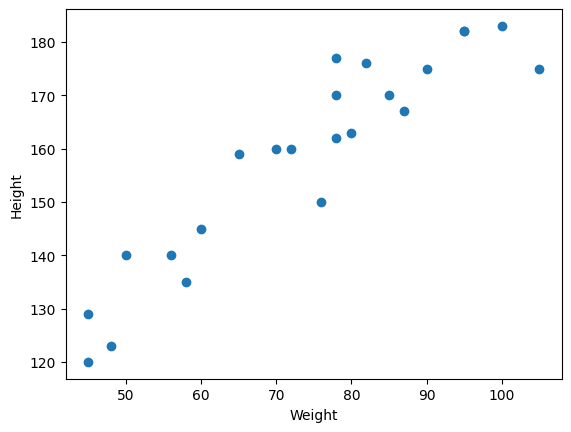

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [8]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [9]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [10]:
x=df[['Weight']]#Independent Feature
y=df['Height']##dependent Feature"

In [12]:
x.shape,y.shape

((23, 1), (23,))

In [13]:
from sklearn.model_selection  import train_test_split

In [14]:
x_tain,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [15]:
x_tain.shape,x_test.shape,y_train.shape,y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
x_tain=scaler.fit_transform(x_tain)

In [19]:
x_test=scaler.transform(x_test)

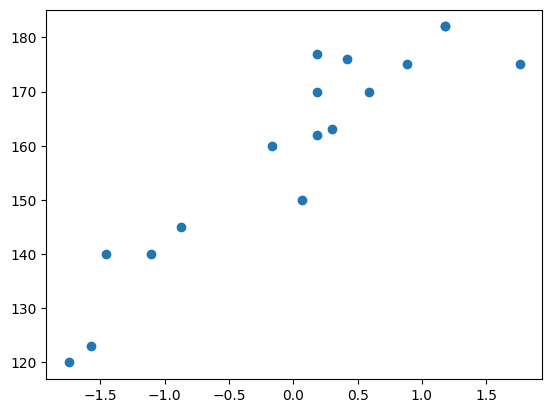

In [20]:
plt.scatter(x_tain,y_train)

In [21]:
#Model Training 

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor=LinearRegression()

In [24]:
#training the tarin data 
regressor.fit(x_tain,y_train)

LinearRegression()

In [25]:
regressor.intercept_

159.41176470588235

In [26]:
regressor.coef_

array([17.74797363])

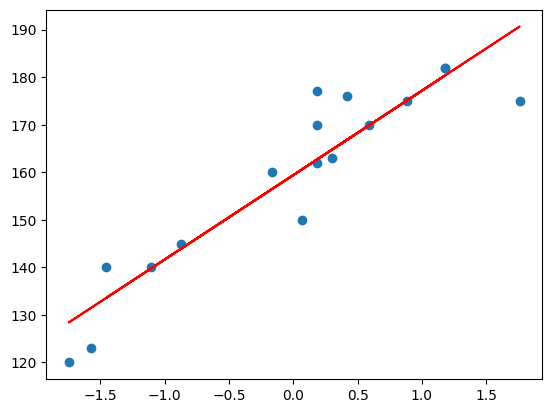

In [28]:
plt.scatter(x_tain,y_train)
plt.plot(x_tain,regressor.predict(x_tain),'r')

In [29]:
##Predication for test data 
y_pred_test=regressor.predict(x_test)

In [30]:
y_pred_test

array([185.46863621, 149.15988083, 171.98252707, 154.34684589,
       141.89812976, 128.41202062])

In [31]:
y_test

13    183
17    159
19    167
4     160
1     135
20    129
Name: Height, dtype: int64

Perfromace metrics MSE,MAE,RMES

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
MSE=mean_squared_error(y_test,y_pred_test)
MAE=mean_absolute_error(y_test,y_pred_test)
RMSE=np.sqrt(MSE)
print(MSE)
print(MAE)
print(RMSE)

34.60595855099189
5.071757617313726
5.882682938166215


Accuracy ofmodel R squared and Adujested R Squared

In [36]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score


0.8983920962535105

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [39]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.872990120316888

In [40]:
scaler

StandardScaler()

In [41]:
regressor

LinearRegression()

In [43]:
import pickle

In [44]:
pickle.dump(scaler,open('scaler1.pkl','wb'))
pickle.dump(regressor,open('regressor1.pkl','wb'))

In [45]:
from sklearn.datasets import fetch_california_housing

In [49]:
california=fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [50]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [51]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [52]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [53]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [54]:
california.target_names

['MedHouseVal']

In [55]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [58]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)##indepdent Feature
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [59]:
dataset['Price']=california.target##dependet feature ,output feature 

In [60]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [62]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [63]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [64]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

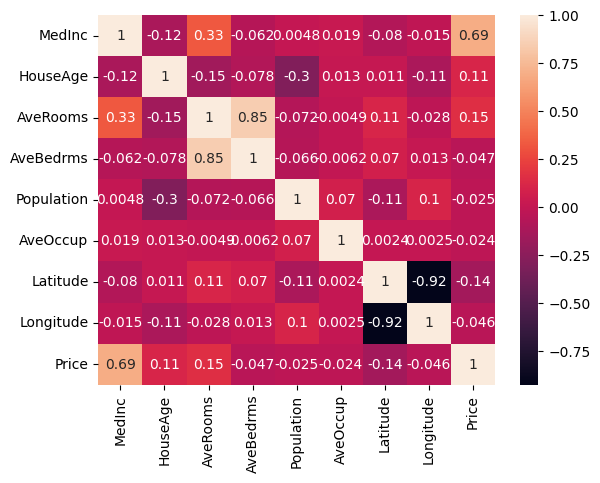

In [65]:
sns.heatmap(dataset.corr(),annot=True)

In [66]:
dataset.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [72]:
x=dataset.iloc[:,:-1]#independent Feature 
y=dataset.iloc[:,-1]#dependent Feature


In [73]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [74]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [76]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [77]:
dataset.shape

(20640, 9)

In [78]:
scaler1=StandardScaler()

In [79]:
x_train_scaled=scaler1.fit_transform(x_train)
x_test_scaled=scaler1.transform(x_test)

In [80]:
x_train_scaled

array([[-0.72607026, -0.04991797, -0.74297851, ..., -0.06755839,
        -0.80067938,  0.71881493],
       [-0.32294264,  0.26728254, -0.08262282, ..., -0.0478457 ,
        -1.30699601,  1.18400647],
       [-0.04383809,  0.98098368, -0.61873843, ...,  0.01657471,
        -0.85224866,  0.67379639],
       ...,
       [ 0.30875381,  0.18798241,  0.2393005 , ..., -0.0507363 ,
        -1.32574847,  1.27404354],
       [ 1.00335669,  0.98098368, -0.06210756, ..., -0.10070777,
        -0.71629327,  0.64878609],
       [-0.08052913,  1.37748432, -0.41959532, ..., -0.1222071 ,
         1.01362187, -1.44207482]])

In [81]:
x_test_scaled

array([[-0.63689577, -0.28781835, -0.56627165, ...,  0.06177   ,
        -0.70222892,  0.8338623 ],
       [ 1.24350662, -1.71522064,  0.46470139, ...,  0.03087168,
         0.78859226, -1.10693682],
       [-0.97932789,  0.7430833 , -0.42895296, ..., -0.07569867,
         1.01830999, -1.3570398 ],
       ...,
       [ 0.1456182 , -1.47732026, -0.26756389, ..., -0.0442765 ,
        -0.15371924,  0.26862956],
       [ 0.91707749, -0.76361911,  0.59128705, ...,  0.00745361,
         0.76983979, -1.1469533 ],
       [-0.88715285, -1.08081962, -0.64735938, ..., -0.05762119,
        -0.79599126,  1.0689591 ]])

In [82]:
regression1=LinearRegression()

In [83]:
regression1

LinearRegression()

In [84]:
regression1.fit(x_train_scaled,y_train)

LinearRegression()

In [85]:
regression1.coef_

array([ 0.83275185,  0.1173856 , -0.27597663,  0.29900186, -0.00795271,
       -0.03963673, -0.88241635, -0.85338011])

In [86]:
regression1.intercept_

2.0678235537790637

In [88]:
y_pred_test=regression1.predict(x_test_scaled)
y_pred_test

array([1.58299034, 3.01567949, 1.75417605, ..., 1.84161594, 2.81049138,
       1.16693905])

In [91]:
MSE=mean_squared_error(y_test,y_pred_test)

In [92]:
MAE=mean_absolute_error(y_test,y_pred_test)

In [94]:
RMSE=np.sqrt(MSE)

In [95]:
MSE,MAE,RMSE

(0.5410055769085322, 0.5409622217186032, 0.7355308130245342)

In [96]:
score1=r2_score(y_test,y_pred_test)

In [97]:
score1

0.6121654293404898

In [98]:
#Adujested 

In [100]:
1 - (1-score1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6114121696742416

In [101]:
import pickle

In [102]:
pickle.dump(scaler1,open('scaler2.pkl','wb'))
pickle.dump(regression1,open('regression2.pkl','wb'))

In [103]:
model=pickle.load(open('regression2.pkl','rb'))
model.predict(x_test_scaled)

array([1.58299034, 3.01567949, 1.75417605, ..., 1.84161594, 2.81049138,
       1.16693905])